In [1]:
import os
import cv2

In [2]:
features = []
target = []
for x in range(0,43):
    ImagesNamesList = os.listdir("/Users/Srushti/Documents/Verzeo/TrafficSignData/" + str(x))
    for y in ImagesNamesList:
        imgarr = cv2.imread("/Users/Srushti/Documents/Verzeo/TrafficSignData/" + str(x) + "/" + y) 
        features.append(imgarr)
        target.append(x)
    print("In Folder", x)

In Folder 0
In Folder 1
In Folder 2
In Folder 3
In Folder 4
In Folder 5
In Folder 6
In Folder 7
In Folder 8
In Folder 9
In Folder 10
In Folder 11
In Folder 12
In Folder 13
In Folder 14
In Folder 15
In Folder 16
In Folder 17
In Folder 18
In Folder 19
In Folder 20
In Folder 21
In Folder 22
In Folder 23
In Folder 24
In Folder 25
In Folder 26
In Folder 27
In Folder 28
In Folder 29
In Folder 30
In Folder 31
In Folder 32
In Folder 33
In Folder 34
In Folder 35
In Folder 36
In Folder 37
In Folder 38
In Folder 39
In Folder 40
In Folder 41
In Folder 42


In [3]:
import numpy as np

In [4]:
features = np.array(features)

In [5]:
target = np.array(target)

In [6]:
features.shape

(34799, 32, 32, 3)

In [7]:
target.shape

(34799,)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
features_train,features_test,target_train,target_test = train_test_split(features,target,test_size=0.2)

In [10]:
features_train.shape

(27839, 32, 32, 3)

In [11]:
target_train.shape

(27839,)

In [12]:
features_test.shape

(6960, 32, 32, 3)

In [13]:
target_test.shape

(6960,)

The technique to generate new images in the training data by modifying the original images in the training data is called Image Augmentation

In [14]:
def preprocessing(image):
    image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY) # Convert colored image to black and white
    image = image/255
    return image

In [15]:
features_train = np.array(list(map(preprocessing,features_train)))

In [16]:
features_train.shape

(27839, 32, 32)

In [17]:
features_train = features_train.reshape(27839,32,32,1)

In [18]:
from keras.preprocessing.image import ImageDataGenerator

In [19]:
dataGen = ImageDataGenerator(rotation_range=10,width_shift_range=0.1,height_shift_range=0.1,zoom_range=0.2,shear_range=0.1)

In [20]:
dataGen.fit(features_train)

In [21]:
batches = dataGen.flow(features_train,target_train,batch_size=20)

Generator function is like a normal function. But in a normal function we use the return keyword to create a value in the global memory, whereas, in a generator function, we will need to use the yield keyword to create a value in the global memory.

1. return - It creates a copy of the value in the global memory, and it also stops the function execution at that line
2. yield - It creates a copy of the value in the global memory, and it also pauses the function execution at that line

In [22]:
len(batches)

1392

In [23]:
images,labels = next(batches)

In [24]:
images.shape

(20, 32, 32, 1)

In [25]:
import matplotlib.pyplot as plt

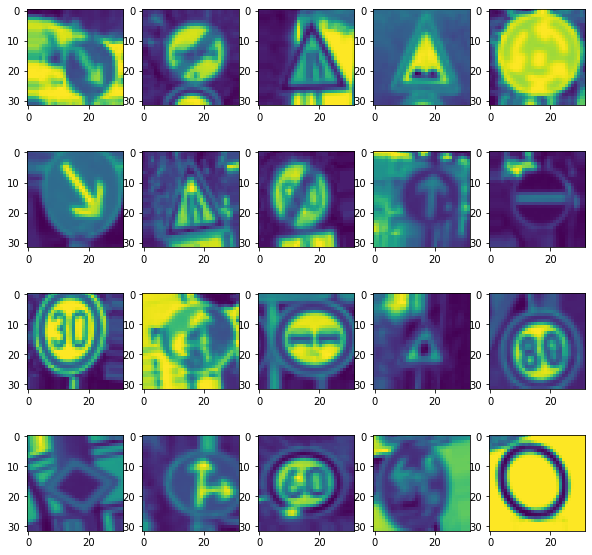

In [26]:
plt.figure(figsize=(10,10))
for i in range(0,20):
    plt.subplot(4,5,i+1)
    plt.imshow(images[i].reshape(32,32))

plt.show()

## One-hot-encoding to increase the number of output layers by increasing the number of neurons in output layer

In [27]:
from tensorflow.keras.utils import to_categorical

In [28]:
target_train=to_categorical(target_train)

In [29]:
target_train.shape

(27839, 43)

In [30]:
features_train.shape

(27839, 32, 32, 1)

# Step 1: Specify the architecture

In [31]:
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout
from keras.models import Sequential

Dropout helps us to block some of the neurons so those neurons will not function hence deliberately reducing the training score.

In [32]:
model = Sequential()
model.add(Conv2D(60,(3,3),activation="relu",input_shape=(32,32,1))) #Parameters: number of filters, filter-size, activation function, input shape of input layer
model.add(Conv2D(60,(3,3),activation="relu"))
#MaxPooling helps to reduce the size of the edge which helps in faster computation
model.add(MaxPooling2D((2,2))) # Size of the window
model.add(Conv2D(30,(3,3),activation="relu"))
model.add(Conv2D(30,(3,3),activation="relu"))
model.add(Conv2D(30,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.5)) # Dropout 50% of the 500 neurons before the output layer
model.add(Flatten())
#actual neurons start here
model.add(Dense(500,activation="relu"))
model.add(Dense(43,activation="softmax")) # 43 neurons in output layer

# Step 2: Compile the model

In [33]:
from keras.optimizers import Adam

In [34]:
model.compile(Adam(learning_rate=0.001),loss="categorical_crossentropy",metrics=["accuracy"])

# Step 3: Train the model

We are going to have to combine the original data with the data obtained after image augmentation

We will use fit_generator which generates and combines new images from training data and fits or scans the data

1. Underfitting - Solved by training more
2. Overfitting - Training score is high, testing score is low - solved by training differently

In order to improve an overfitting model, we will deliberately reduce the training score, in the hope that maybe the testing score will improve.

In [35]:
model.fit(dataGen.flow(features_train,target_train,batch_size=20),epochs=20)

Epoch 1/20
1392/1392 [==============================] - 146s 94ms/step - loss: 2.9994 - accuracy: 0.1844
Epoch 2/20
1392/1392 [==============================] - 128s 92ms/step - loss: 0.9191 - accuracy: 0.7169
Epoch 3/20
1392/1392 [==============================] - 127s 91ms/step - loss: 0.5438 - accuracy: 0.8293
Epoch 4/20
1392/1392 [==============================] - 128s 92ms/step - loss: 0.3881 - accuracy: 0.8813
Epoch 5/20
1392/1392 [==============================] - 118s 85ms/step - loss: 0.3061 - accuracy: 0.9022
Epoch 6/20
1392/1392 [==============================] - 119s 86ms/step - loss: 0.2735 - accuracy: 0.9140
Epoch 7/20
1392/1392 [==============================] - 120s 86ms/step - loss: 0.2290 - accuracy: 0.9308
Epoch 8/20
1392/1392 [==============================] - 121s 87ms/step - loss: 0.2136 - accuracy: 0.9327
Epoch 9/20
1392/1392 [==============================] - 123s 88ms/step - loss: 0.1801 - accuracy: 0.9418
Epoch 10/20
1392/1392 [==============================] 

# Step 4: Predict the model

In [1]:
from keras.models import model_from_json

In [37]:
model_json = model.to_json()
with open('verzeoAITraffic.json',"w") as abc:
    abc.write(model_json)
    abc.close
    
model.save_weights("verzeoAITraffic.h5")
print("Save the Model")

Save the Model


In [38]:
json_file = open('verzeoAITraffic.json','r')
loaded_model_json = json_file.read()
json_file.close()

loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights('verzeoAITraffic.h5')
print("Loaded Model Successfully")

Loaded Model Successfully


In [39]:
import numpy as np
import cv2

def getClassName(classNo):
    if classNo == 0: return 'Speed Limit 20 km/h'
    elif classNo == 1: return 'Speed Limit 30 km/h'
    elif classNo == 2: return 'Speed Limit 50 km/h'
    elif classNo == 3: return 'Speed Limit 60 km/h'
    elif classNo == 4: return 'Speed Limit 70 km/h'
    elif classNo == 5: return 'Speed Limit 80 km/h'
    elif classNo == 6: return 'End of Speed Limit 80 km/h'
    elif classNo == 7: return 'Speed Limit 100 km/h'
    elif classNo == 8: return 'Speed Limit 120 km/h'
    elif classNo == 9: return 'No passing'
    elif classNo == 10: return 'No passing for vehicles over 3.5 metric tons'
    elif classNo == 11: return 'Right-of-way at the next intersection'
    elif classNo == 12: return 'Priority road'
    elif classNo == 13: return 'Yield'
    elif classNo == 14: return 'Stop'
    elif classNo == 15: return 'No vehicles'
    elif classNo == 16: return 'Vehicles over 3.5 metric tons prohibited'
    elif classNo == 17: return 'No entry'
    elif classNo == 18: return 'General Caution'
    elif classNo == 19: return 'Dangerous curve to the left'
    elif classNo == 20: return 'Dangerous curve to the right'
    elif classNo == 21: return 'Double curve'
    elif classNo == 22: return 'Bumpy road'
    elif classNo == 23: return 'Slippery road'
    elif classNo == 24: return 'Road narrows on the right'
    elif classNo == 25: return 'Road work'
    elif classNo == 26: return 'Traffic signals'
    elif classNo == 27: return 'Pedestrians'
    elif classNo == 28: return 'Children crossing'
    elif classNo == 29: return 'Bicycles crossing'
    elif classNo == 30: return 'Beware of ice/snow'
    elif classNo == 31: return 'Wild animals crossing'
    elif classNo == 32: return 'End of all speed and passing limits'
    elif classNo == 33: return 'Turn right ahead'
    elif classNo == 34: return 'Turn left ahead'
    elif classNo == 35: return 'Ahead only'
    elif classNo == 36: return 'Go straight or right'
    elif classNo == 37: return 'Go straight or left'
    elif classNo == 38: return 'Keep right'
    elif classNo == 39: return 'Keep left'   
    elif classNo == 40: return 'Roundabout mandatory'
    elif classNo == 41: return 'End of no passing'
    elif classNo == 42: return 'End of no passing by vehicles over 3.5 metric tons'  

In [40]:
capt = cv2.VideoCapture(0)
capt.set(3,640)
capt.set(4,480)
capt.set(10,180)
capt.open(0)

True

In [41]:
while True:
    message,image = capt.read()
    imagearr = np.asarray(image)
    imagearr = cv2.resize(imagearr,(32,32))
    imagearr = preprocessing(imagearr)
    imagearr = imagearr.reshape(1,32,32,1)
    predictions = loaded_model.predict(imagearr)
    classIndex = np.argmax(model.predict(imagearr), axis=-1)
    cv2.startWindowThread()
    cv2.putText(image,"Class: ",(20,35),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2)
    cv2.putText(image,"Probability: ",(20,75),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2)
    probabilityValue = np.amax(predictions)
    if probabilityValue>0.75:
        cv2.putText(image,getClassName(classIndex),(120,35),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2)
        cv2.putText(image,str(probabilityValue*100) + "%",(200,75),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2)
    cv2.imshow("Model Prediction",image)
    returnedValue = cv2.waitKey(1)
    if returnedValue == ord('s') or returnedValue == ord('S'):
        cv2.destroyAllWindows()
        break